<ipython-input-1-dcf55d93852b>:13: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='viridis')


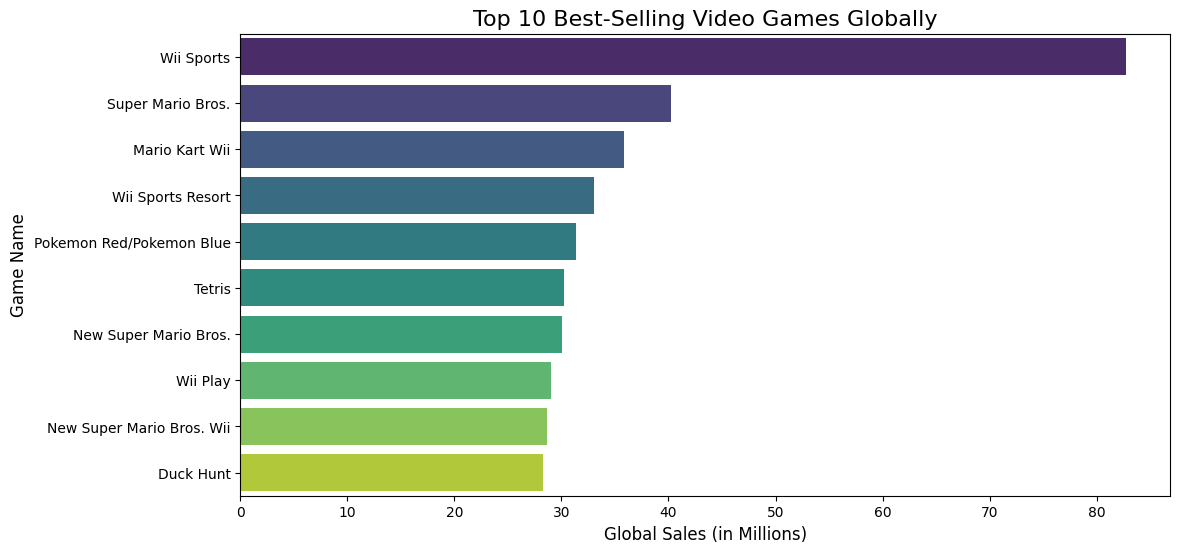

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Load dataset
data = pd.read_csv('vgsales.csv')

# Top 10 best-selling games
top_games = data.sort_values(by='Global_Sales', ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x='Global_Sales', y='Name', data=top_games, palette='viridis')
plt.title('Top 10 Best-Selling Video Games Globally', fontsize=16)
plt.xlabel('Global Sales (in Millions)', fontsize=12)
plt.ylabel('Game Name', fontsize=12)
plt.show()



<ipython-input-2-48d6785b70f1>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='coolwarm')


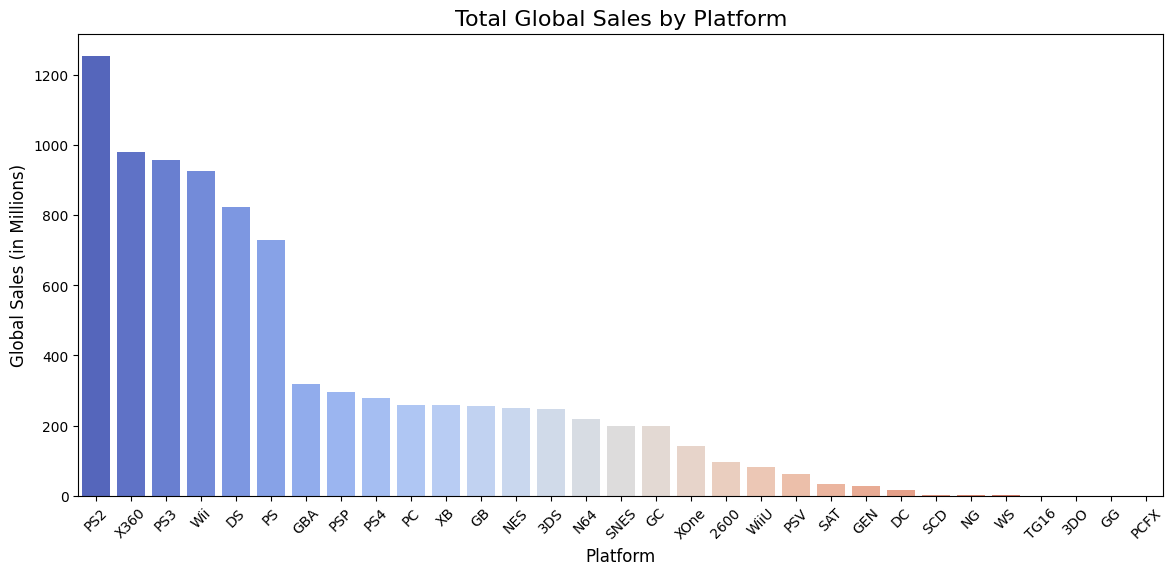

In [ ]:
# Total sales by platform
platform_sales = data.groupby('Platform')['Global_Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x=platform_sales.index, y=platform_sales.values, palette='coolwarm')
plt.title('Total Global Sales by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global Sales (in Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.show()


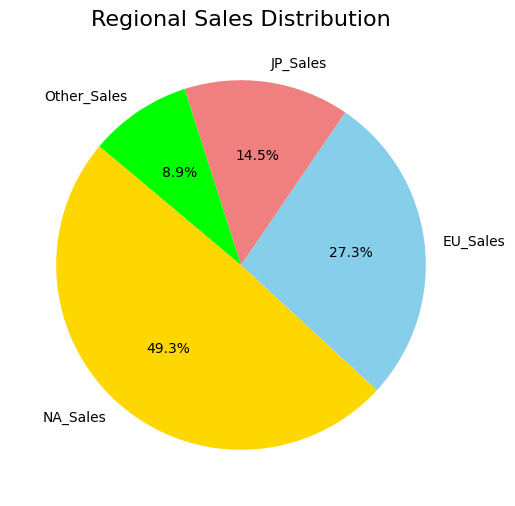

In [ ]:
# Regional sales distribution
regions = ['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']
region_sales = data[regions].sum()

# Plot
plt.figure(figsize=(10, 6))
region_sales.plot(kind='pie', autopct='%1.1f%%', startangle=140, colors=['gold', 'skyblue', 'lightcoral', 'lime'])
plt.title('Regional Sales Distribution', fontsize=16)
plt.ylabel('')
plt.show()


<ipython-input-4-83273680900e>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='mako')


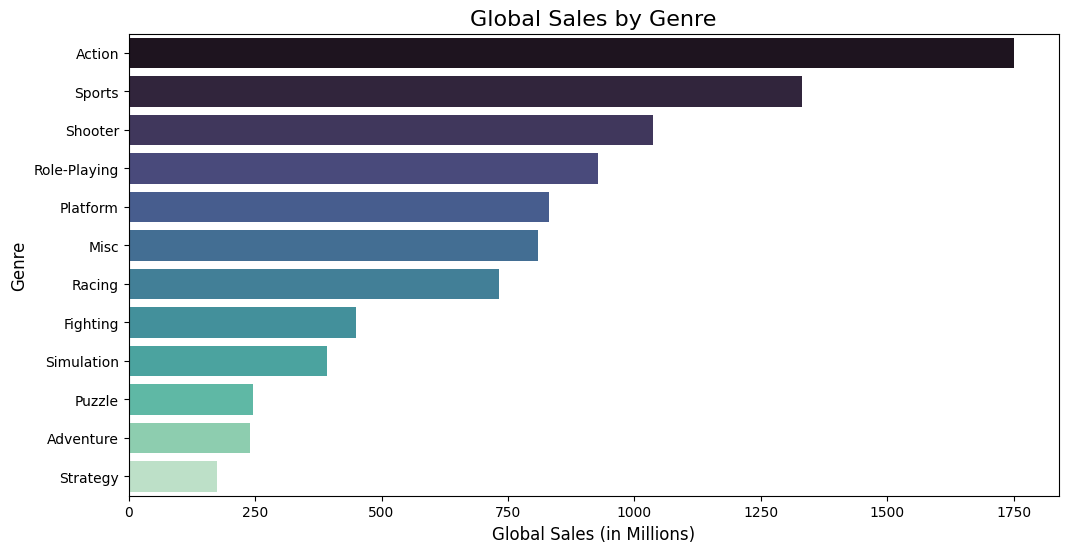

In [ ]:
# Total sales by genre
genre_sales = data.groupby('Genre')['Global_Sales'].sum().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=genre_sales.values, y=genre_sales.index, palette='mako')
plt.title('Global Sales by Genre', fontsize=16)
plt.xlabel('Global Sales (in Millions)', fontsize=12)
plt.ylabel('Genre', fontsize=12)
plt.show()


<ipython-input-5-c48596c6da9f>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='cubehelix')


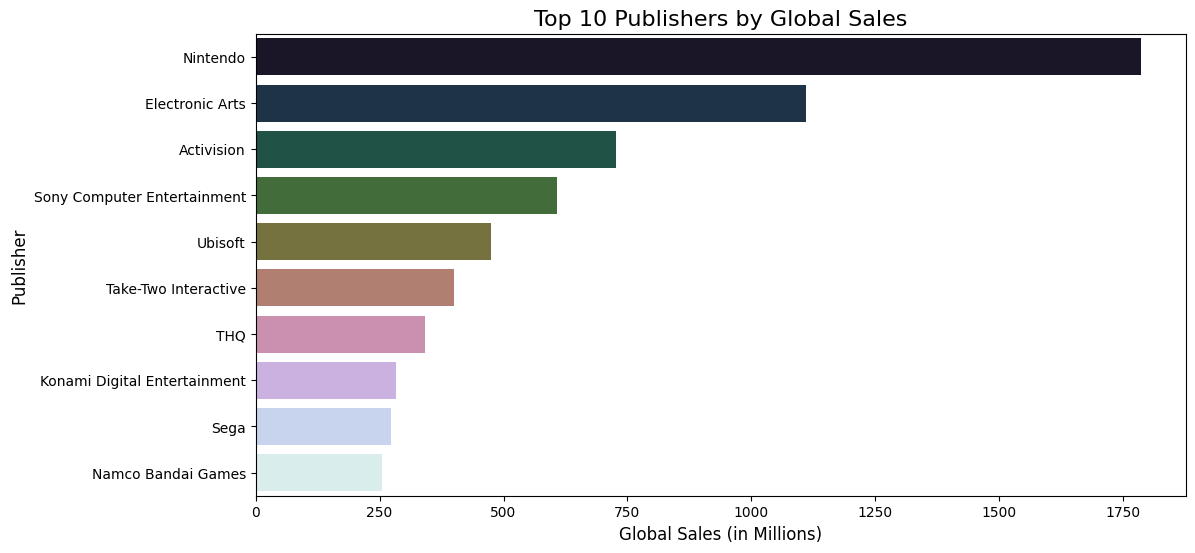

In [ ]:
# Top 10 publishers by global sales
top_publishers = data.groupby('Publisher')['Global_Sales'].sum().sort_values(ascending=False).head(10)

# Plot
plt.figure(figsize=(12, 6))
sns.barplot(x=top_publishers.values, y=top_publishers.index, palette='cubehelix')
plt.title('Top 10 Publishers by Global Sales', fontsize=16)
plt.xlabel('Global Sales (in Millions)', fontsize=12)
plt.ylabel('Publisher', fontsize=12)
plt.show()


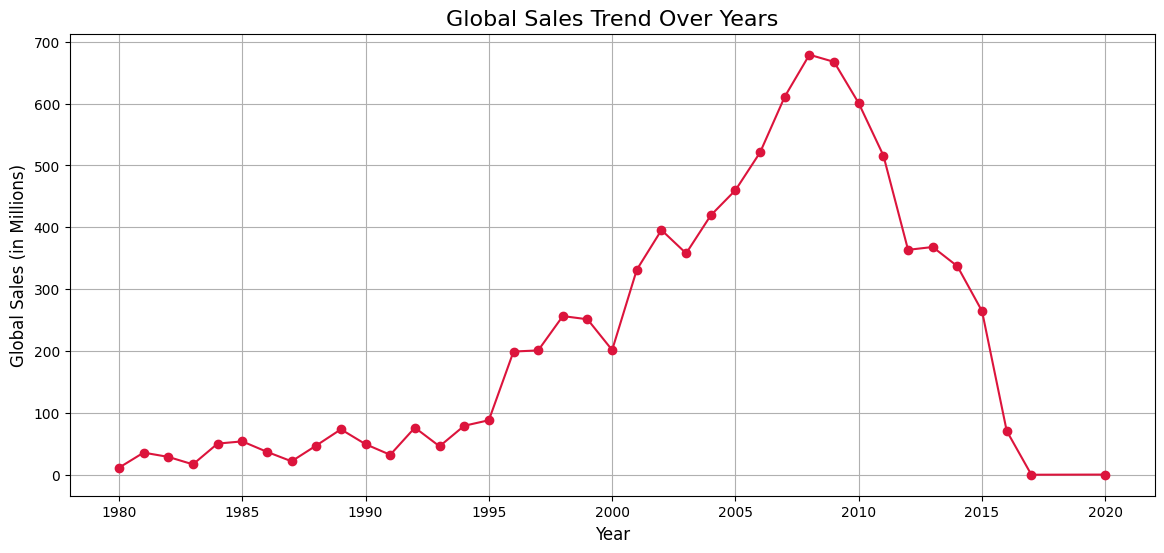

In [ ]:
# Convert Year column to numeric
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')

# Sales trend over years
yearly_sales = data.groupby('Year')['Global_Sales'].sum()

# Plot
plt.figure(figsize=(14, 6))
plt.plot(yearly_sales.index, yearly_sales.values, marker='o', color='crimson')
plt.title('Global Sales Trend Over Years', fontsize=16)
plt.xlabel('Year', fontsize=12)
plt.ylabel('Global Sales (in Millions)', fontsize=12)
plt.grid()
plt.show()


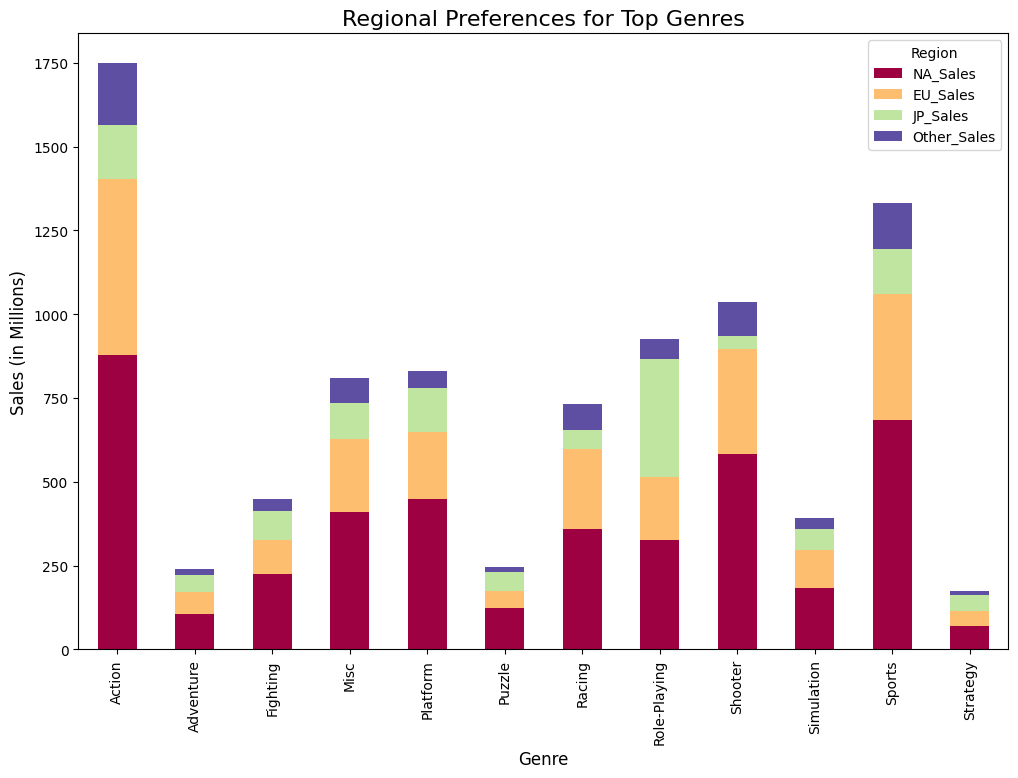

In [ ]:
# Regional sales by genre
regional_genre = data.groupby('Genre')[regions].sum()

# Plot
regional_genre.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='Spectral')
plt.title('Regional Preferences for Top Genres', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Sales (in Millions)', fontsize=12)
plt.legend(title='Region')
plt.show()


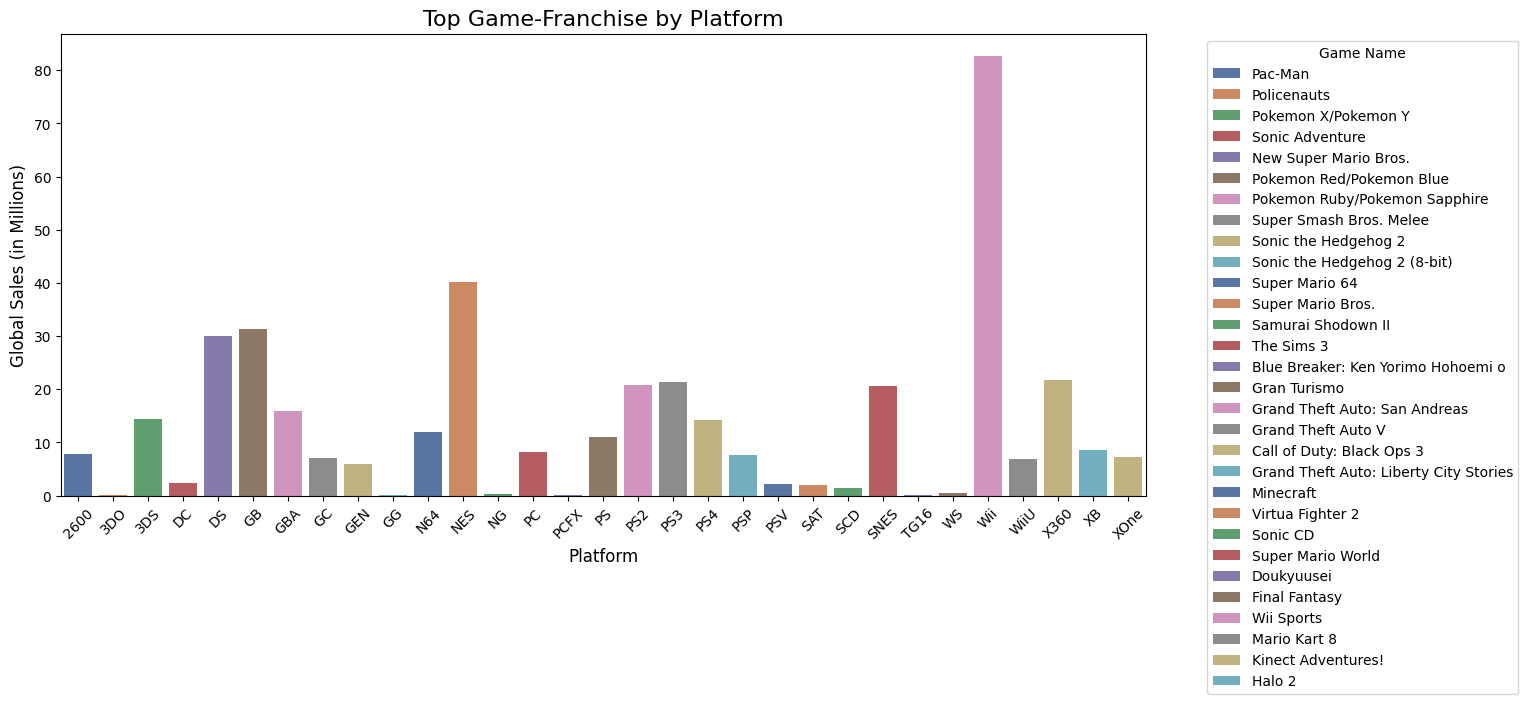

In [ ]:
# Top franchise per platform
platform_top_games = data.groupby(['Platform', 'Name'])['Global_Sales'].sum().reset_index()
top_franchise = platform_top_games.loc[platform_top_games.groupby('Platform')['Global_Sales'].idxmax()]

# Plot
plt.figure(figsize=(14, 6))
sns.barplot(x='Platform', y='Global_Sales', hue='Name', data=top_franchise, dodge=False, palette='deep')
plt.title('Top Game-Franchise by Platform', fontsize=16)
plt.xlabel('Platform', fontsize=12)
plt.ylabel('Global Sales (in Millions)', fontsize=12)
plt.xticks(rotation=45)
plt.legend(title='Game Name', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()


                   Train R2   Test R2       MAE       MSE
Linear Regression  0.999987  0.999993  0.003064  0.000029
Random Forest      0.996482  0.831010  0.040763  0.722935
Gradient Boosting  0.998806  0.864537  0.044628  0.579506


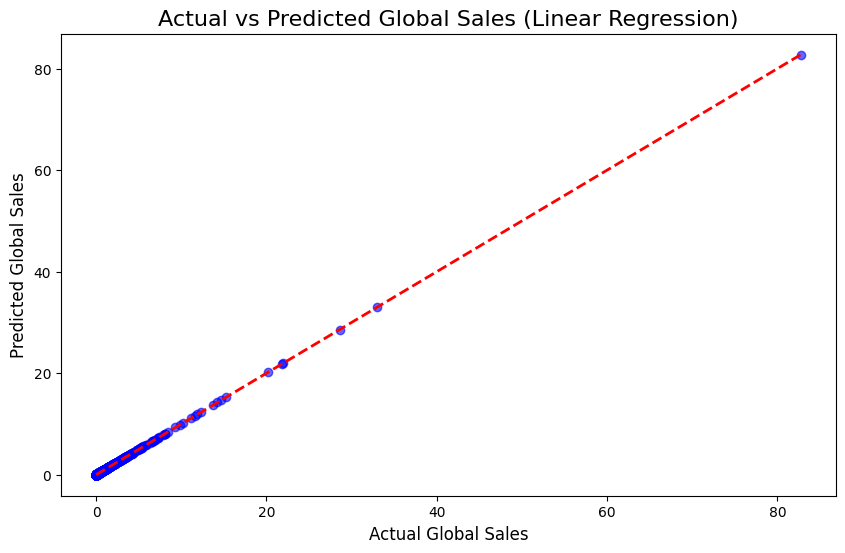

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('vgsales.csv')

# Data preprocessing
data = data.dropna()  # Drop rows with missing values
data['Year'] = pd.to_numeric(data['Year'], errors='coerce')
data = data.dropna(subset=['Year'])  # Remove rows with invalid years

# Encode categorical variables
encoded_data = pd.get_dummies(data, columns=['Platform', 'Genre', 'Publisher'], drop_first=True)

# Feature selection
X = encoded_data[['NA_Sales', 'EU_Sales', 'JP_Sales', 'Other_Sales']]
y = encoded_data['Global_Sales']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Model training
models = {
    'Linear Regression': LinearRegression(),
    'Random Forest': RandomForestRegressor(random_state=42, n_estimators=100),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42)
}

results = {}

for name, model in models.items():
    model.fit(X_train, y_train)
    y_train_pred = model.predict(X_train)
    y_test_pred = model.predict(X_test)

    # Evaluate the model
    results[name] = {
        'Train R2': r2_score(y_train, y_train_pred),
        'Test R2': r2_score(y_test, y_test_pred),
        'MAE': mean_absolute_error(y_test, y_test_pred),
        'MSE': mean_squared_error(y_test, y_test_pred)
    }

# Display results
results_df = pd.DataFrame(results).T
print(results_df)

# Visualize predictions of the best model
best_model_name = results_df['Test R2'].idxmax()
best_model = models[best_model_name]
y_test_pred = best_model.predict(X_test)

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_test_pred, alpha=0.6, color='blue')
plt.plot([0, max(y_test)], [0, max(y_test)], color='red', linestyle='--', linewidth=2)
plt.title(f'Actual vs Predicted Global Sales ({best_model_name})', fontsize=16)
plt.xlabel('Actual Global Sales', fontsize=12)
plt.ylabel('Predicted Global Sales', fontsize=12)
plt.show()
